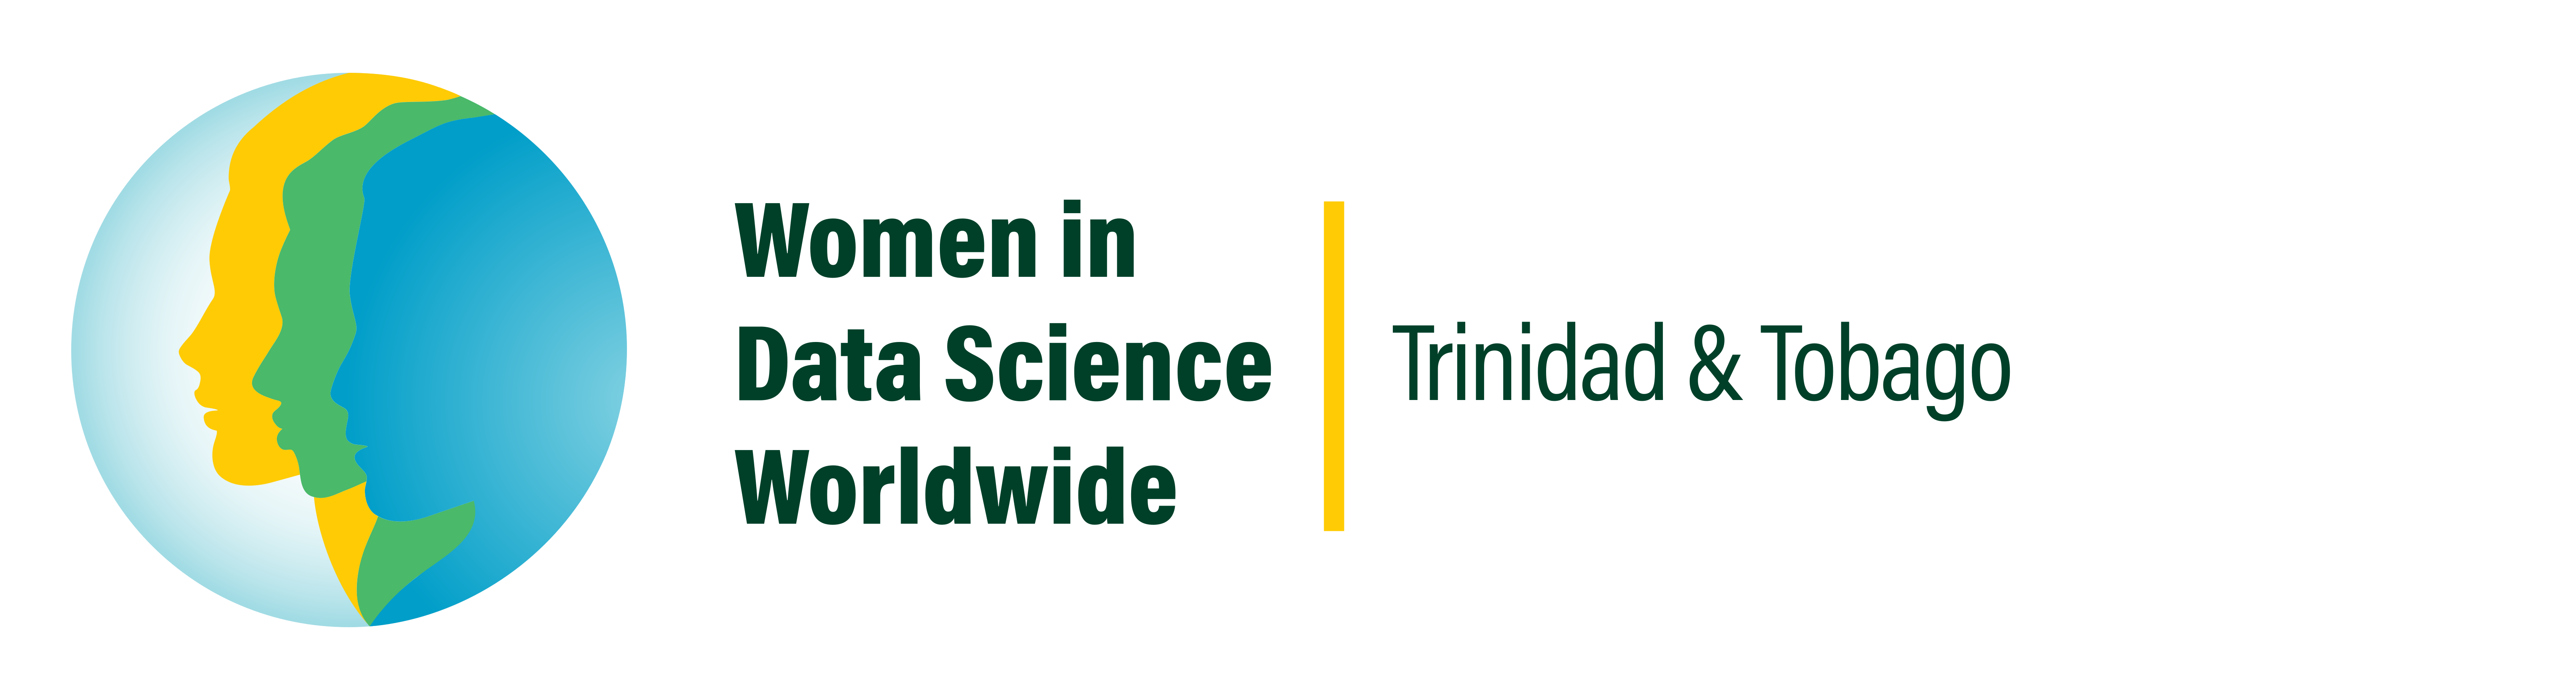

In [ ]:
from PIL import Image

img = Image.open('/content/WiDS-line1-3.png')
display(img)

## **WOMEN IN DATA SCIENCE WORLDWIDE | TRINIDAD AND TOBAGO 2024**

The dataset contains a record of each reported wildlife strike of a military, commercial, or civil aircraft between 1990 and 2015. Each row contains the incident date, aircraft operator, aircraft make and model, engine make and model, airport name and location, species name and quantity, and aircraft damage.

https://www.kaggle.com/datasets/faa/wildlife-strikes?resource=download

### Load the Dataset and Basic Information

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#reading our dataset
df = pd.read_csv('/content/database.csv')

<ipython-input-3-67b707c6b275>:2: DtypeWarning: Columns (9,12,15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/database.csv')


In [ ]:
df.shape

(174104, 66)

In [ ]:
df.head()

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Count the unique values in the 'Aircraft Type' column
aircraft_type_counts = df['Aircraft Type'].value_counts()

# Display the count of unique values in 'Aircraft Type'
print("\nCount of Unique Values in 'Aircraft Type':\n", aircraft_type_counts)


Count of Unique Values in 'Aircraft Type':
 Aircraft Type
A    130919
B      2150
J         5
Name: count, dtype: int64


In [ ]:
# Display the column names
print("Column Names:\n")
print(df.columns.tolist())

# Display basic information about the dataset
print("\nDataset Information:\n")
df_info = df.info()
print(df_info)

# Display the first few rows
print("\nFirst Few Rows:\n")
df_head = df.head()
print(df_head)


Column Names:

['Record ID', 'Incident Year', 'Incident Month', 'Incident Day', 'Operator ID', 'Operator', 'Aircraft', 'Aircraft Type', 'Aircraft Make', 'Aircraft Model', 'Aircraft Mass', 'Engine Make', 'Engine Model', 'Engines', 'Engine Type', 'Engine1 Position', 'Engine2 Position', 'Engine3 Position', 'Engine4 Position', 'Airport ID', 'Airport', 'State', 'FAA Region', 'Warning Issued', 'Flight Phase', 'Visibility', 'Precipitation', 'Height', 'Speed', 'Distance', 'Species ID', 'Species Name', 'Species Quantity', 'Flight Impact', 'Fatalities', 'Injuries', 'Aircraft Damage', 'Radome Strike', 'Radome Damage', 'Windshield Strike', 'Windshield Damage', 'Nose Strike', 'Nose Damage', 'Engine1 Strike', 'Engine1 Damage', 'Engine2 Strike', 'Engine2 Damage', 'Engine3 Strike', 'Engine3 Damage', 'Engine4 Strike', 'Engine4 Damage', 'Engine Ingested', 'Propeller Strike', 'Propeller Damage', 'Wing or Rotor Strike', 'Wing or Rotor Damage', 'Fuselage Strike', 'Fuselage Damage', 'Landing Gear Strike', '

### Summary Statistics

In [ ]:
# Generate summary statistics
summary_statistics = df.describe(include='all')
print("\nSummary Statistics:\n", summary_statistics)



Summary Statistics:
             Record ID  Incident Year  Incident Month   Incident Day  \
count   174104.000000  174104.000000   174104.000000  174104.000000   
unique            NaN            NaN             NaN            NaN   
top               NaN            NaN             NaN            NaN   
freq              NaN            NaN             NaN            NaN   
mean    241204.036915    2006.036392        7.171840      15.712264   
std      94013.682213       6.747708        2.790152       8.799405   
min       1000.000000    1990.000000        1.000000       1.000000   
25%     205411.750000    2001.000000        5.000000       8.000000   
50%     249102.500000    2007.000000        8.000000      16.000000   
75%     322592.250000    2012.000000        9.000000      23.000000   
max     367445.000000    2015.000000       12.000000      31.000000   

       Operator ID Operator Aircraft Aircraft Type Aircraft Make  \
count       174104   174104   174104        133074       

In [ ]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
# Summary statistics for numerical columns
summary_stats = df[numerical_cols].describe()
print(summary_stats)


           Record ID  Incident Year  Incident Month   Incident Day  \
count  174104.000000  174104.000000   174104.000000  174104.000000   
mean   241204.036915    2006.036392        7.171840      15.712264   
std     94013.682213       6.747708        2.790152       8.799405   
min      1000.000000    1990.000000        1.000000       1.000000   
25%    205411.750000    2001.000000        5.000000       8.000000   
50%    249102.500000    2007.000000        8.000000      16.000000   
75%    322592.250000    2012.000000        9.000000      23.000000   
max    367445.000000    2015.000000       12.000000      31.000000   

       Aircraft Mass    Engine Make        Engines  Engine2 Position  \
count  127320.000000  123434.000000  127342.000000     118715.000000   
mean        3.510611      21.306958       2.057656          2.918570   
std         0.873783      11.023161       0.469374          2.008204   
min         1.000000       1.000000       1.000000          1.000000   
25%      

In [ ]:
print(df['Incident Year'].mode())

0    2014
Name: Incident Year, dtype: int64


###  Handling Missing Values

In [ ]:
test_missing_values = df.isnull().sum()
test_missing_values = test_missing_values[test_missing_values > 0]
print("\nColumns with Missing Values and Their Counts:\n", test_missing_values)
count_columns_with_missing = test_missing_values.count()
print("\nCount of Columns with Missing Values:", count_columns_with_missing)


Columns with Missing Values and Their Counts:
 Aircraft Type        41030
Aircraft Make        43053
Aircraft Model       51665
Aircraft Mass        46784
Engine Make          50670
Engine Model         52116
Engines              46762
Engine Type          46822
Engine1 Position     47911
Engine2 Position     55389
Engine3 Position    162445
Engine4 Position    171012
Airport                290
State                21976
FAA Region           18902
Warning Issued       97686
Flight Phase         55302
Visibility           64171
Precipitation        85782
Height               70427
Speed               102846
Distance             74391
Species Name            80
Species Quantity      4477
Flight Impact        74639
Fatalities          173539
Injuries            173875
dtype: int64

Count of Columns with Missing Values: 27


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Drop rows with all missing values (if any)
df_cleaned = df.dropna(how='all')

# Optionally, fill missing values or drop rows/columns with significant missing data
# Example: Filling missing values with a placeholder
df_cleaned = df_cleaned.fillna('Unknown')

print("\nMissing Values After Cleaning:\n", df_cleaned.isnull().sum())



Missing Values:
 Record ID         0
Incident Year     0
Incident Month    0
Incident Day      0
Operator ID       0
                 ..
Tail Damage       0
Lights Strike     0
Lights Damage     0
Other Strike      0
Other Damage      0
Length: 66, dtype: int64

Missing Values After Cleaning:
 Record ID         0
Incident Year     0
Incident Month    0
Incident Day      0
Operator ID       0
                 ..
Tail Damage       0
Lights Strike     0
Lights Damage     0
Other Strike      0
Other Damage      0
Length: 66, dtype: int64


### Exploratory Data Analysis (EDA)

In [ ]:
# Example EDA tasks:
# 1. Most common aircraft operators involved in wildlife strikes
common_operators = df_cleaned['Operator'].value_counts().head(10)
print("\nMost Common Aircraft Operators:\n", common_operators)

# 2. Most common wildlife species involved in strikes
common_species = df_cleaned['Species Name'].value_counts().head(10)
print("\nMost Common Wildlife Species:\n", common_species)

# 3. Incidents per year
incidents_per_year = df_cleaned['Incident Year'].value_counts().sort_index()
print("\nIncidents Per Year:\n", incidents_per_year)



Most Common Aircraft Operators:
 Operator
UNKNOWN               39540
BUSINESS              14271
SOUTHWEST AIRLINES    13864
UNITED AIRLINES       13207
AMERICAN AIRLINES     10358
MILITARY               8046
FEDEX EXPRESS          6289
DELTA AIR LINES        6155
UPS AIRLINES           4534
1US AIRWAYS            3960
Name: count, dtype: int64

Most Common Wildlife Species:
 Species Name
UNKNOWN MEDIUM BIRD    38531
UNKNOWN SMALL BIRD     32981
MOURNING DOVE           7653
GULL                    6580
UNKNOWN BIRD            6400
KILLDEER                4562
AMERICAN KESTREL        4476
BARN SWALLOW            4215
HORNED LARK             3952
EUROPEAN STARLING       3915
Name: count, dtype: int64

Incidents Per Year:
 Incident Year
1990     2099
1991     2672
1992     2816
1993     2849
1994     2938
1995     2989
1996     3215
1997     3651
1998     4131
1999     5385
2000     6351
2001     6216
2002     6659
2003     6485
2004     7122
2005     7591
2006     7750
2007     7993
20

### Correlation Matrix for Numerical Data

In [ ]:

# Compute the correlation matrix
correlation_matrix = df[numerical_cols].corr()

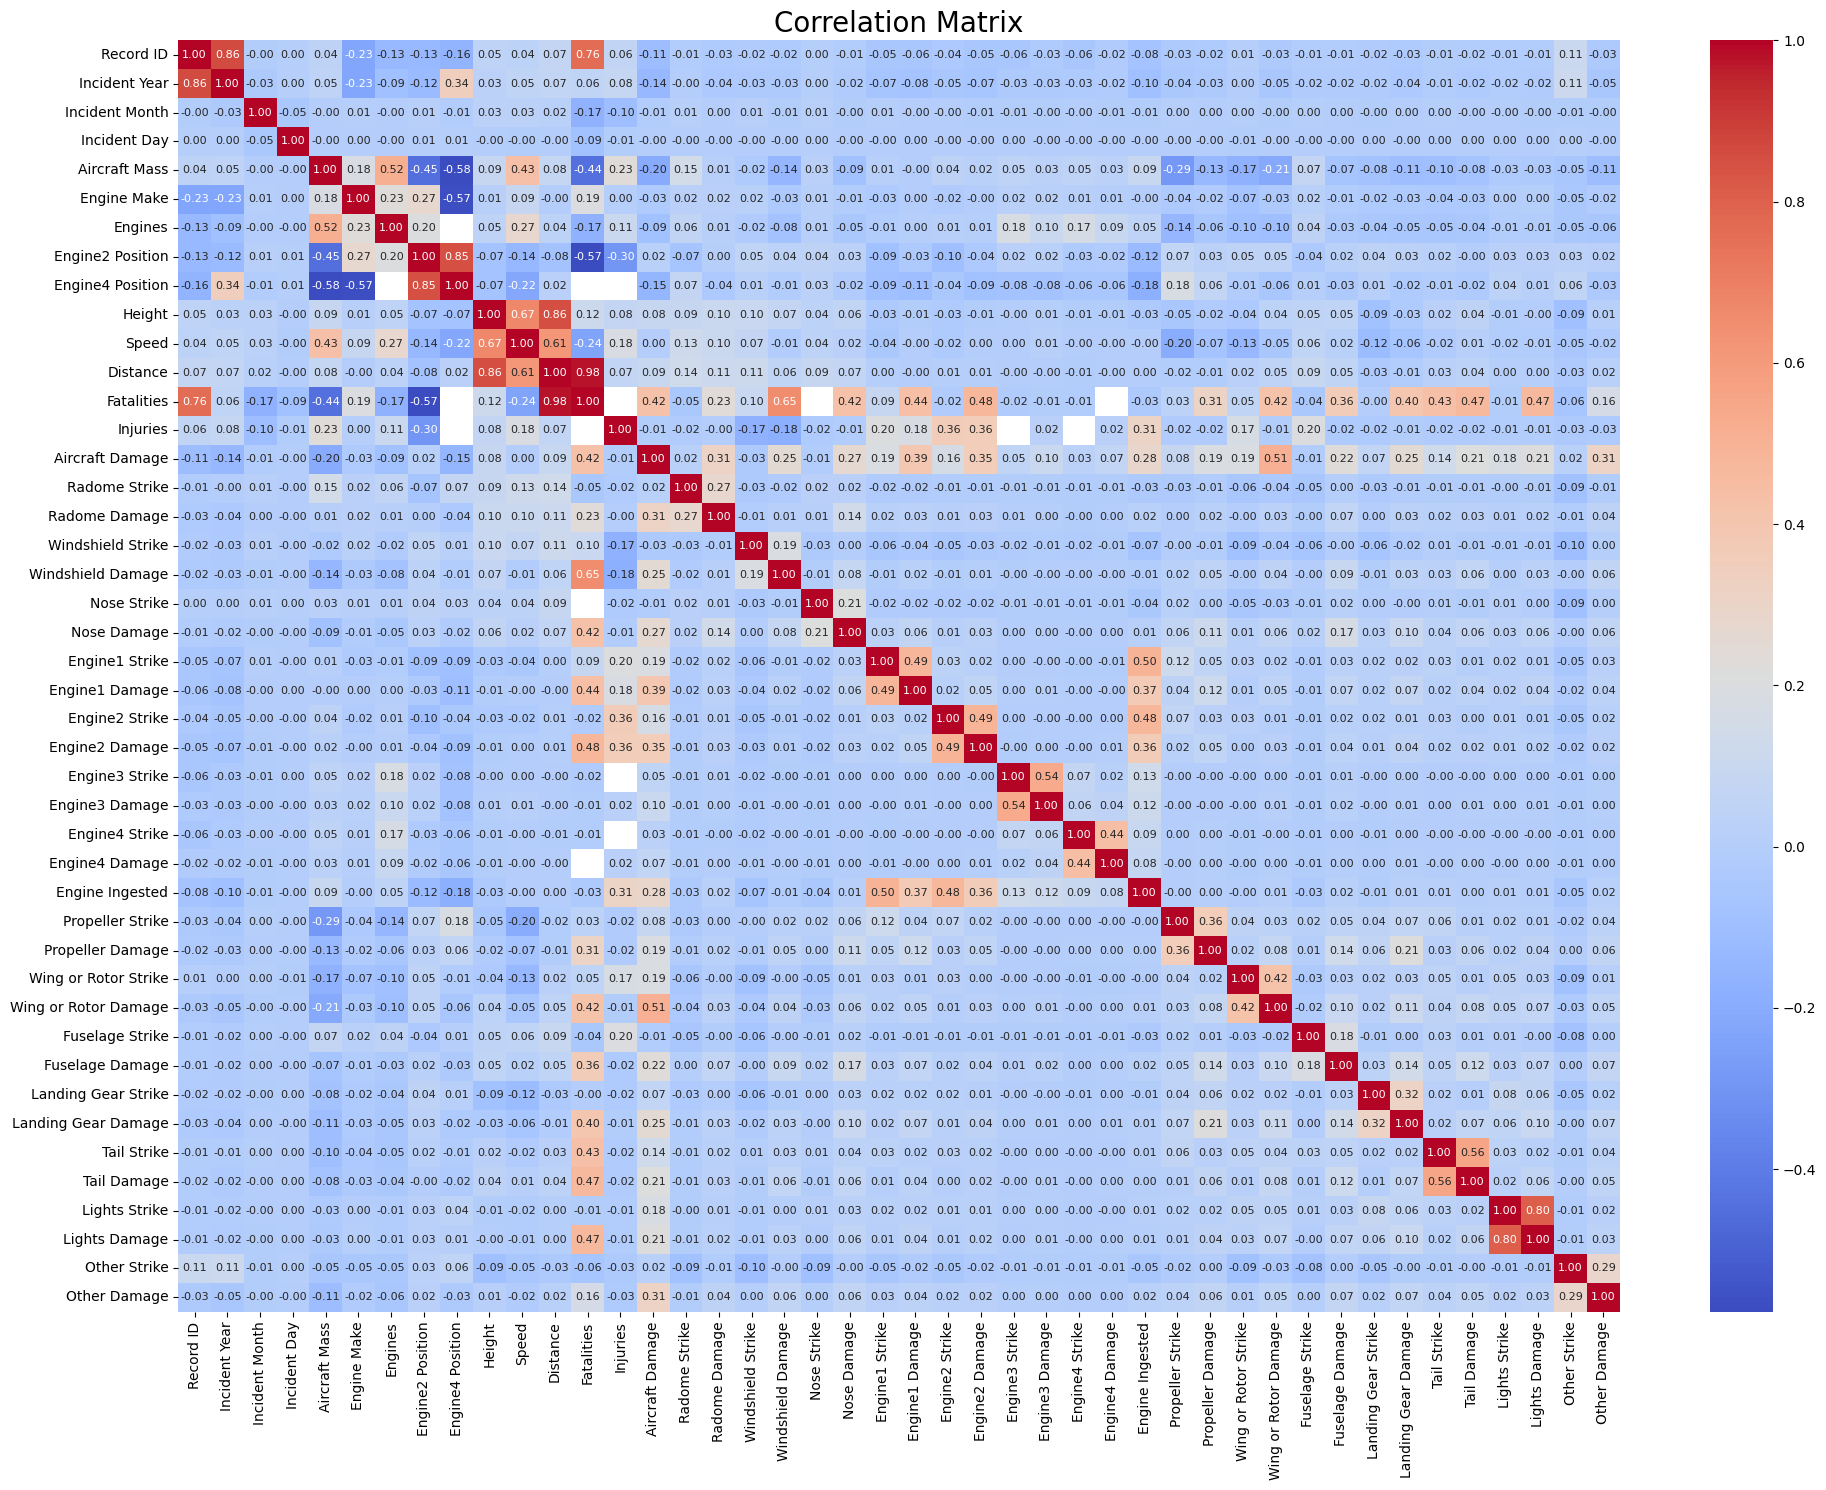

In [ ]:
# Plot the heatmap
plt.figure(figsize=(20, 15))  # Increase figure size
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 8})
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels and adjust font size
plt.yticks(fontsize=10)  # Adjust y-axis labels font size
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()

A **correlation matrix** shows the correlation coefficients between pairs of numerical variables in a dataset. The correlation coefficient is a measure of the linear relationship between two variables and ranges from -1 to 1. The values generally indicate:

*   1: Perfect positive linear relationship
*   0: No linear relationship
*   -1: Perfect negative linear relationship

**Interpreting Your Correlation Matrix**

To interpret the correlation matrix, follow these steps:

***Identify Strong Correlations:***

Positive Correlations: Look for values close to 1. These indicate that as one variable increases, the other variable also increases.
Negative Correlations: Look for values close to -1. These indicate that as one variable increases, the other variable decreases.

***Identify Weak Correlations:***

Values close to 0 suggest a weak or no linear relationship between the variables.

***Assess Potential Multicollinearity:***

If two or more independent variables are highly correlated, it can indicate multicollinearity, which might affect regression analyses.

Example Insights from a Hypothetical Correlation Matrix
Let's assume we have some significant correlations in the dataset related to aircraft incidents:

Speed vs. Height: A high positive correlation (e.g., 0.67) suggests that as the speed of the aircraft increases, the height at which it flies also moderately increases.

### General Visualization

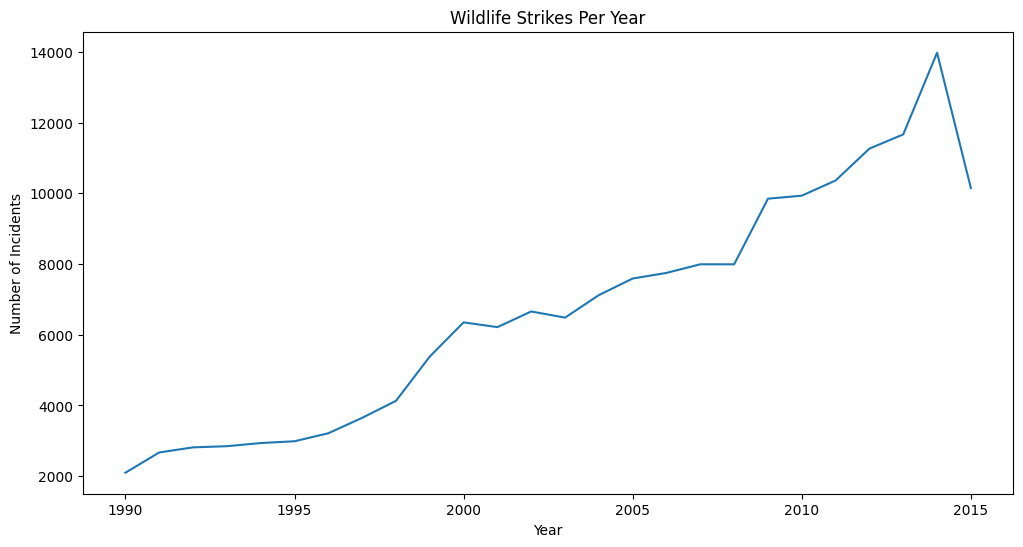

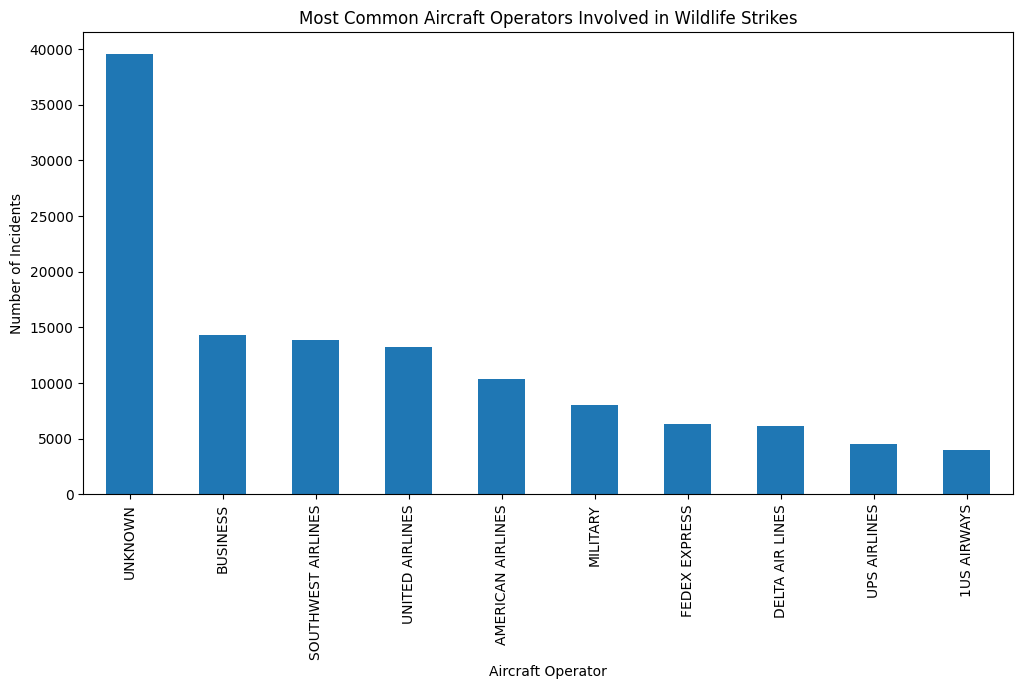

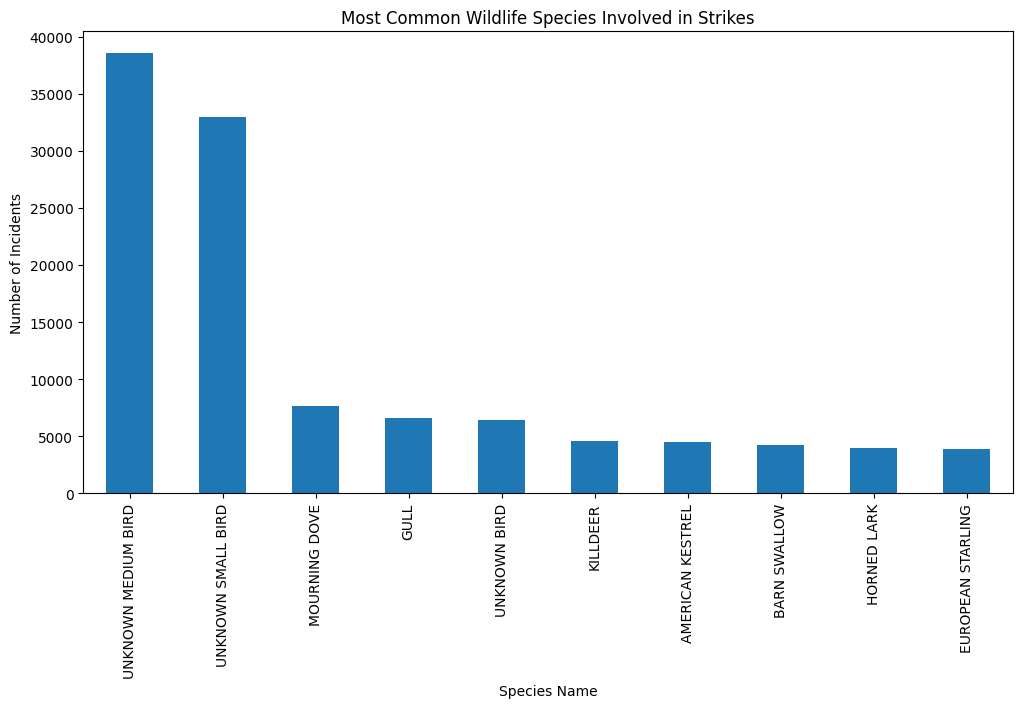

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot incidents per year
plt.figure(figsize=(12, 6))
sns.lineplot(x=incidents_per_year.index, y=incidents_per_year.values)
plt.title("Wildlife Strikes Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.show()

# Plot most common aircraft operators
plt.figure(figsize=(12, 6))
common_operators.plot(kind='bar')
plt.title("Most Common Aircraft Operators Involved in Wildlife Strikes")
plt.xlabel("Aircraft Operator")
plt.ylabel("Number of Incidents")
plt.show()

# Plot most common wildlife species
plt.figure(figsize=(12, 6))
common_species.plot(kind='bar')
plt.title("Most Common Wildlife Species Involved in Strikes")
plt.xlabel("Species Name")
plt.ylabel("Number of Incidents")
plt.show()


### Visualizations for Categorical Data

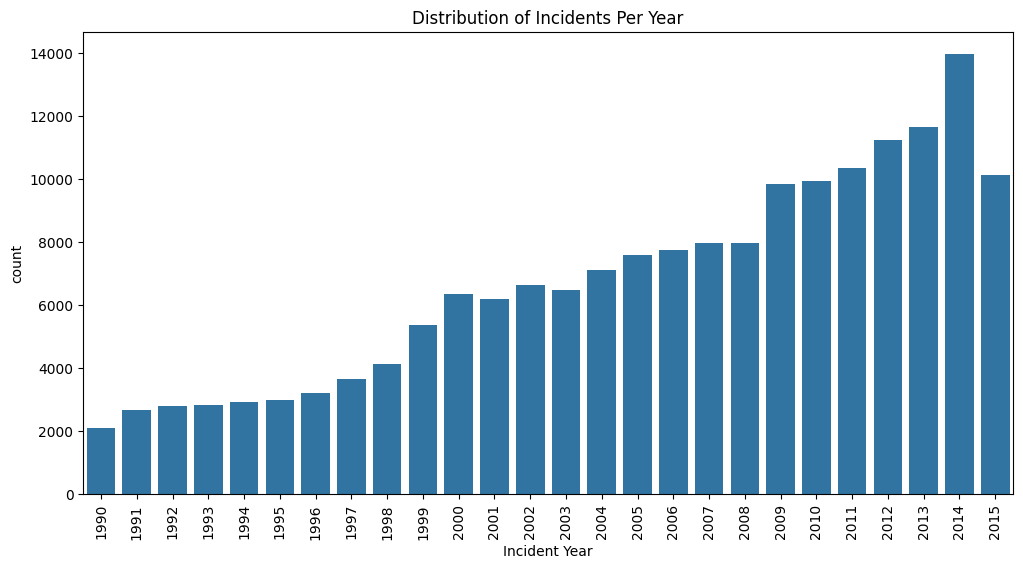

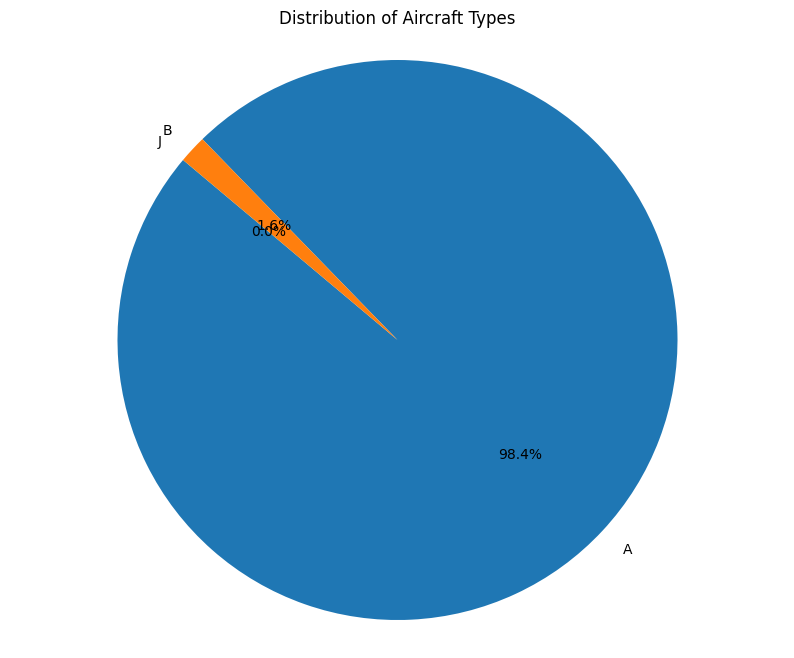

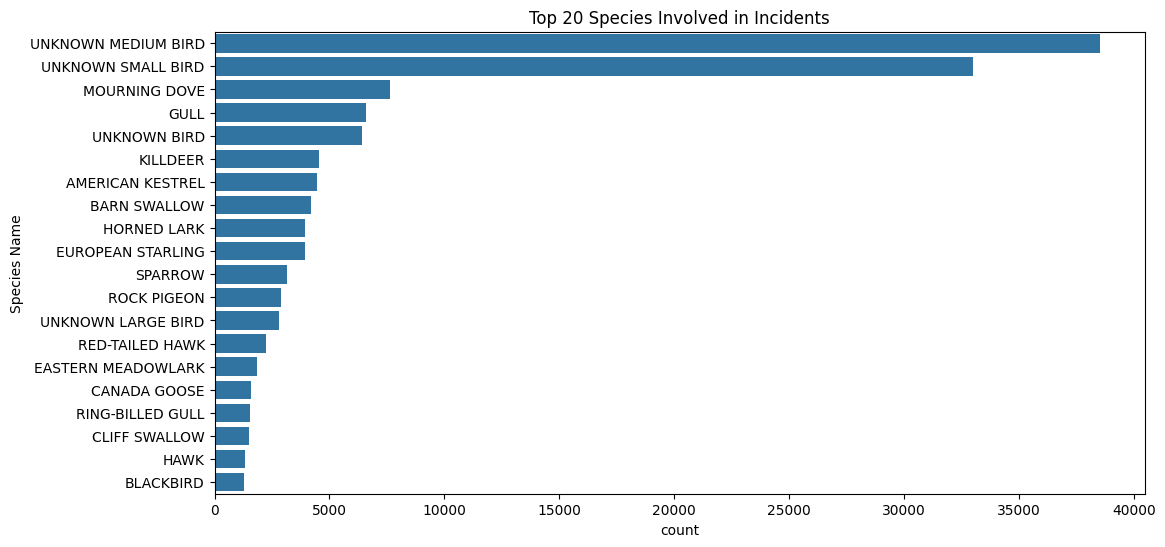

In [ ]:
# Visualize the distribution of incidents per year
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Incident Year')
plt.title('Distribution of Incidents Per Year')
plt.xticks(rotation=90)
plt.show()

# Plot a pie chart
plt.figure(figsize=(10, 8))
plt.pie(aircraft_type_counts, labels=aircraft_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Aircraft Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Visualize the distribution of species names
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Species Name', order=df['Species Name'].value_counts().index[:20]) # Top 20 species
plt.title('Top 20 Species Involved in Incidents')
plt.show()

### Visualizations for Numerical Data



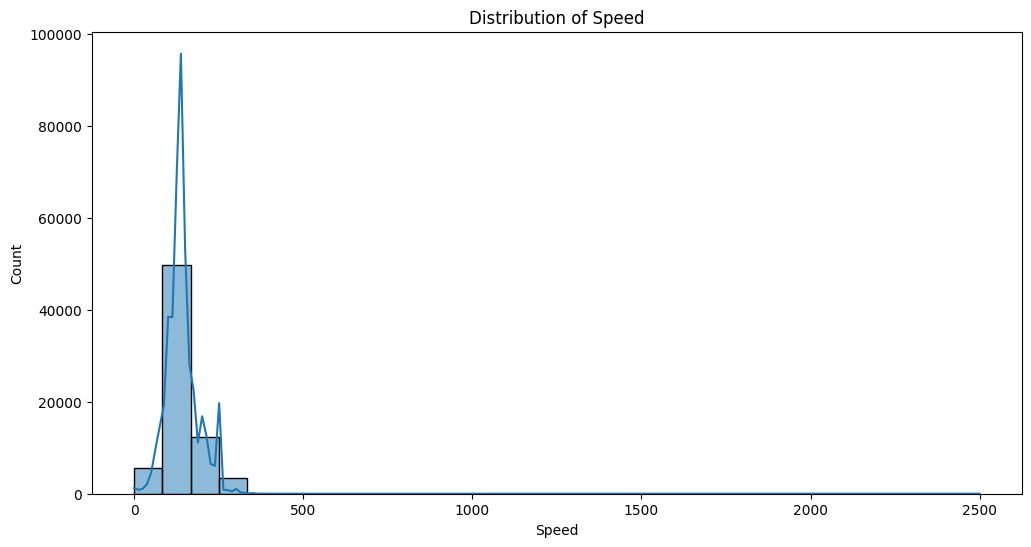

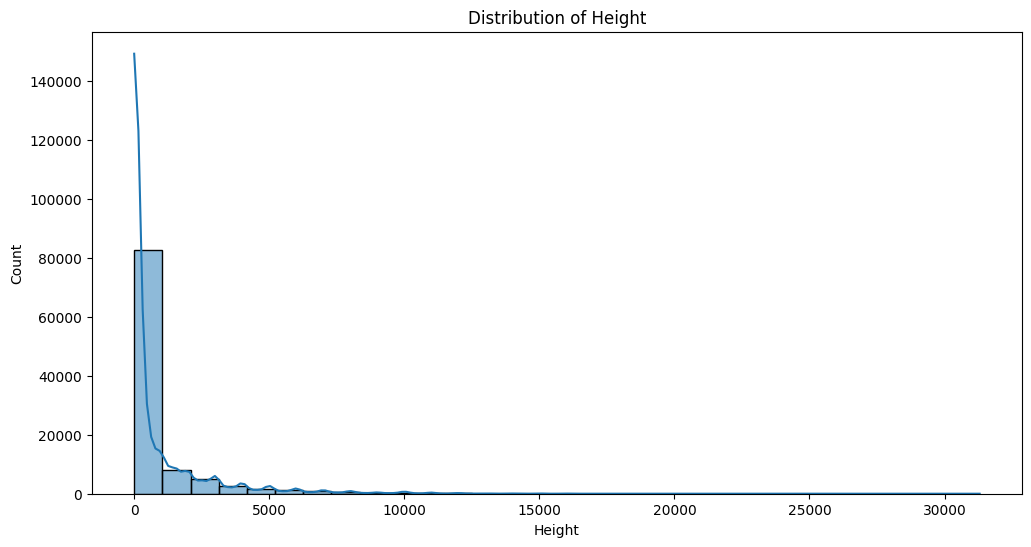

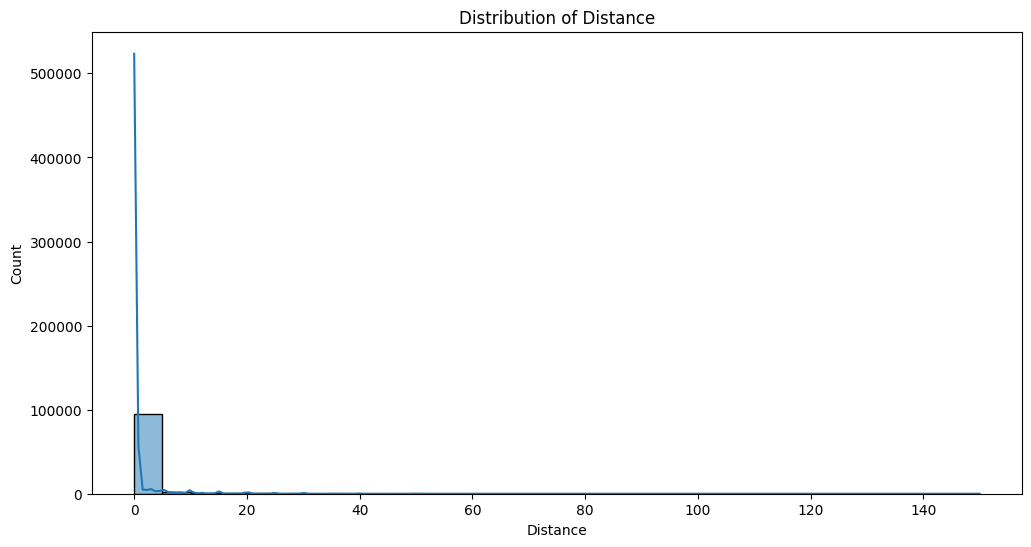

In [ ]:
# Visualize the distribution of speed
plt.figure(figsize=(12, 6))
sns.histplot(df['Speed'].dropna(), bins=30, kde=True)
plt.title('Distribution of Speed')
plt.show()

# Visualize the distribution of height
plt.figure(figsize=(12, 6))
sns.histplot(df['Height'].dropna(), bins=30, kde=True)
plt.title('Distribution of Height')
plt.show()

# Visualize the distribution of distance
plt.figure(figsize=(12, 6))
sns.histplot(df['Distance'].dropna(), bins=30, kde=True)
plt.title('Distribution of Distance')
plt.show()

### Simple Modeling

In [ ]:
#For instance, predicting the number of incidents per year using a simple linear regression model.


Mean Squared Error: 1406754.0355668475
R-squared: 0.8991648991231136


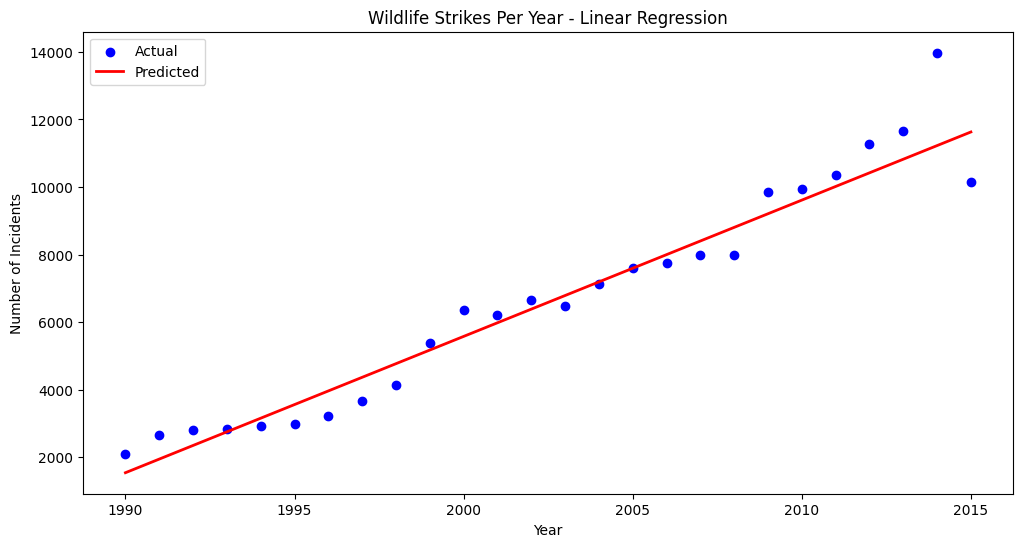

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
X = incidents_per_year.index.values.reshape(-1, 1)
y = incidents_per_year.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the regression line
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Predicted')
plt.title("Wildlife Strikes Per Year - Linear Regression")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.legend()
plt.show()


#### Discussion

The Mean Squared Error (MSE) and R-squared are two metrics commonly used to evaluate the performance of a regression model. Let's break down what these metrics tell us:

#### Mean Squared Error (MSE)
Mean Squared Error measures the average squared difference between the observed actual outcomes and the predicted outcomes by the model.

MSE = 1406754.0355668475: This value represents the average squared error of the predictions. A lower MSE indicates that the model's predictions are closer to the actual values, implying better performance. However, the MSE alone does not provide much insight unless compared to other models or the variance of the data.

#### R-squared
R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables.

R-squared = 0.8991648991231136: This value indicates that approximately 89.92% of the variance in the dependent variable is explained by the independent variables in the model. An R squared value closer to 1 suggests that the model explains a large portion of the variance in the outcome variable, indicating a good fit.

#### Interpretation

High R-squared (0.899): This means the model explains about 90% of the variance in the outcome variable. The model is likely a good fit for the data.

MSE (1406754.035): This gives the average squared difference between predicted and actual values. To fully understand this number, it should be considered in the context of the data range. If this value is relatively low compared to the variance of the target variable, it indicates good predictive accuracy.

### Creating a dashboard

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output

# Define the main menu function
def main_menu():
    clear_output(wait=True)
    display(button_incidents_per_year)
    display(button_common_operators)
    display(button_common_species)
    display(button_correlation_matrix)

# Define functions for interactive widgets with a back button
def plot_incidents_per_year(_):
    clear_output(wait=True)
    incidents_per_year = df_cleaned['Incident Year'].value_counts().sort_index()
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=incidents_per_year.index, y=incidents_per_year.values)
    plt.title("Wildlife Strikes Per Year")
    plt.xlabel("Year")
    plt.ylabel("Number of Incidents")
    plt.show()
    display(button_back)

def plot_common_operators(_):
    clear_output(wait=True)
    common_operators = df_cleaned['Operator'].value_counts().head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=common_operators.index, y=common_operators.values)
    plt.title("Most Common Aircraft Operators Involved in Wildlife Strikes")
    plt.xlabel("Aircraft Operator")
    plt.ylabel("Number of Incidents")
    plt.xticks(rotation=45)
    plt.show()
    display(button_back)

def plot_common_species(_):
    clear_output(wait=True)
    common_species = df_cleaned['Species Name'].value_counts().head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=common_species.index, y=common_species.values)
    plt.title("Most Common Wildlife Species Involved in Strikes")
    plt.xlabel("Species Name")
    plt.ylabel("Number of Incidents")
    plt.xticks(rotation=45)
    plt.show()
    display(button_back)

def plot_correlation_matrix(_):
    clear_output(wait=True)
    numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
    correlation_matrix = df_cleaned[numerical_cols].corr()
    plt.figure(figsize=(16, 12))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()
    display(button_back)

# Create buttons for each plot
button_incidents_per_year = widgets.Button(description="Incidents Per Year")
button_common_operators = widgets.Button(description="Common Operators")
button_common_species = widgets.Button(description="Common Species")
button_correlation_matrix = widgets.Button(description="Correlation Matrix")
button_back = widgets.Button(description="Back")

# Attach functions to buttons
button_incidents_per_year.on_click(plot_incidents_per_year)
button_common_operators.on_click(plot_common_operators)
button_common_species.on_click(plot_common_species)
button_correlation_matrix.on_click(plot_correlation_matrix)
button_back.on_click(lambda _: main_menu())

# Display the main menu
main_menu()

Button(description='Incidents Per Year', style=ButtonStyle())

Button(description='Common Operators', style=ButtonStyle())

Button(description='Common Species', style=ButtonStyle())

Button(description='Correlation Matrix', style=ButtonStyle())